# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading compressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
import pandas as pd
import pickle

### ~ 1.1
#!head data/articles.tsv
articles = pd.read_csv("data/articles.tsv.gz", sep='\t', error_bad_lines = False, compression='gzip', warn_bad_lines=False)
mapping = pd.read_pickle("data/mapping.pickle")
topics = pd.read_json("data/topics.jsonl.gz",  lines = True, compression='gzip',)

articles.head(182) # This is to make a comparison to Task 2.1

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Khulna,0,2,1,0,0,2,0,2,0,...,0,1,1,0,1,1,0,2,1,2
1,Karim_Ansarifard,1,5,1,1,1,3,6,4,5,...,2,2,0,1,2,0,1,0,0,0
2,Poldhu,0,0,1,1,0,1,0,2,2,...,0,2,2,0,0,0,2,1,2,1
3,Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Palmyra,1,4,0,0,0,2,11,2,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Lampada_ad_arco,4,10,5,6,9,12,13,15,8,...,7,4,0,1,3,6,1,4,3,2
178,Achille_Majocchi,0,0,0,0,2,0,2,0,0,...,1,1,0,0,0,0,0,0,1,0
179,Olympus_E-P1,1,0,2,1,0,2,1,1,0,...,0,0,1,0,0,1,0,0,0,0
180,Discussione:Jitter,21,41,42,55,51,31,31,39,60,...,32,34,28,17,13,34,33,16,21,21


## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [2]:
### ~ 2.1
Discussione = articles[articles['index'].str.contains('Discussione')]

articles.drop(index=Discussione.index,inplace=True)

articles.head(182) # Compared with Task 1, we can see the 'Discussione:Jitter' in location #180 is gone

# Discription: First we found all rows whose index contain 'Discussione', then we drop them and keep 
# the rows which do not contain 'Discussione'

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Khulna,0,2,1,0,0,2,0,2,0,...,0,1,1,0,1,1,0,2,1,2
1,Karim_Ansarifard,1,5,1,1,1,3,6,4,5,...,2,2,0,1,2,0,1,0,0,0
2,Poldhu,0,0,1,1,0,1,0,2,2,...,0,2,2,0,0,0,2,1,2,1
3,Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Palmyra,1,4,0,0,0,2,11,2,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Lampada_ad_arco,4,10,5,6,9,12,13,15,8,...,7,4,0,1,3,6,1,4,3,2
178,Achille_Majocchi,0,0,0,0,2,0,2,0,0,...,1,1,0,0,0,0,0,0,1,0
179,Olympus_E-P1,1,0,2,1,0,2,1,1,0,...,0,0,1,0,0,1,0,0,0,0
181,Allsvenskan_1997,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

In [3]:
### ~ 3.1.1

print("There are " + str(len(articles.index)) + " articles.")
# The number of articles is the the number of raws in the articles Dataframe
print("There are " + str(len(topics.columns.drop('index'))) + " topics")   
# The topic names are represented as the columns of the topics Dataframe, so we take the columns of the Dataframe while dropping the firt 'index' column

print("The topics are the following:")
print(topics.columns.drop('index').values) # print the names of the articles

There are 55791 articles.
There are 64 topics
The topics are the following:
['Geography.Regions.Asia.Central Asia'
 'Geography.Regions.Europe.Eastern Europe'
 'History and Society.Military and warfare' 'Culture.Media.Television'
 'History and Society.Education' 'Culture.Media.Books'
 'Geography.Regions.Africa.Africa*' 'Culture.Visual arts.Architecture'
 'Culture.Biography.Women' 'Geography.Regions.Americas.North America'
 'STEM.STEM*' 'Culture.Performing arts' 'Culture.Literature'
 'History and Society.Politics and government'
 'Geography.Regions.Africa.Northern Africa' 'STEM.Earth and environment'
 'Geography.Regions.Africa.Central Africa' 'STEM.Medicine & Health'
 'STEM.Libraries & Information' 'Geography.Regions.Europe.Europe*'
 'Geography.Regions.Europe.Western Europe' 'Culture.Media.Radio'
 'STEM.Space' 'Culture.Visual arts.Comics and Anime' 'STEM.Technology'
 'Culture.Internet culture' 'Culture.Media.Software'
 'Geography.Regions.Asia.East Asia'
 'Geography.Regions.Europe.Souther

In [5]:
### ~ 3.1.2

daily_average_by_article = articles.mean(axis = 1)
# This calculates the average daily number of pageviews of each article in the "articles" dataset.
daily_average_all_article = daily_average_by_article.sum(axis = 0)
# This calculates the average daily number of pageviews of all articles in the "articles" dataset.

print("The average daily number of pageviews in the dataset is " + str(daily_average_all_article))

The average daily number of pageviews in the dataset is 324267.67126192997


In [6]:
### ~ 3.1.3

# After checking the Wikipedia website, we found that between 2018/1/1 and 2020/7/31, the average 
# daily page view is 5,731,987.

daily_total = 5731987

percentage = daily_average_all_article/daily_total # calculate the percentage

print("The percentage is about " + str(percentage))

The percentage is about 0.0565715992136636



### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



In [7]:
### ~ 3.2.1
### Your code here! ###

# Get the articles that meet both conditions
Virus = articles[articles['index'].str.contains('Virus')&(articles.sum(1)>7000)]
Virus # show the result

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
5133,Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,...,13,12,13,9,6,10,11,7,7,8
41679,Virus_(informatica),26,70,74,66,86,44,67,94,107,...,21,38,21,18,30,24,33,28,22,17
56429,Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,...,11,10,10,4,4,9,4,12,5,7


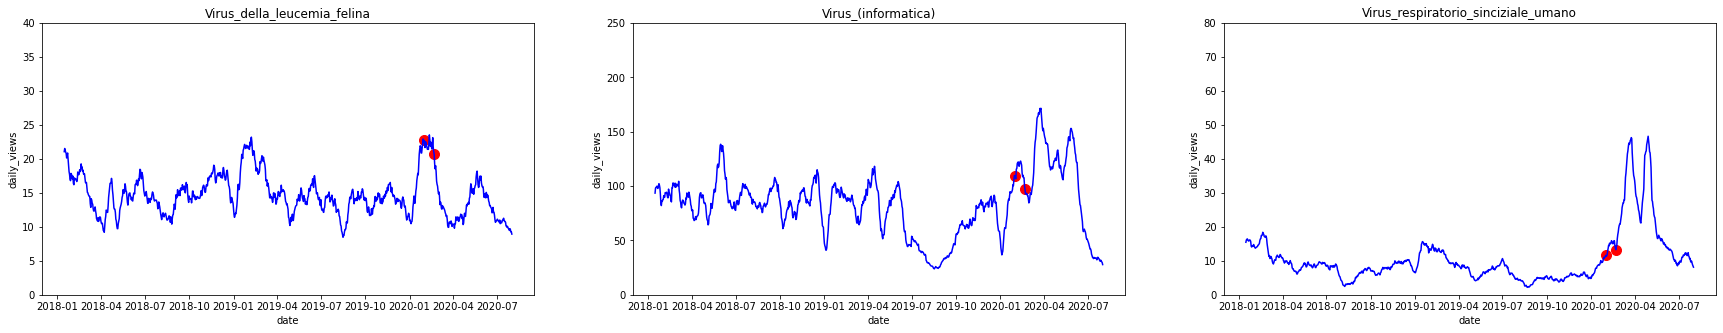

In [8]:
import matplotlib.pyplot as plt
import math
plt.figure(figsize=(30,5)) # change this if needed
### ~ 3.2.2~
### Your code here! ###

# Delete the name lable so that we can turn it to datetime objects later
article1 = Virus.drop('index', axis=1).loc[Virus.index[0]]
article2 = Virus.drop('index', axis=1).loc[Virus.index[1]]
article3 = Virus.drop('index', axis=1).loc[Virus.index[2]]

# Compute the index of '2020-01-31' and '2020-02-21' in the date array
index_date1 = article1.index.values.tolist().index('2020-01-31 00:00:00')
index_date2 = article1.index.values.tolist().index('2020-02-21 00:00:00')

# Filter the noise
article1_smooth = pd.Series(article1).rolling(window = 15).mean()
article2_smooth = pd.Series(article2).rolling(window = 15).mean()
article3_smooth = pd.Series(article3).rolling(window = 15).mean()

# Turn string type dates into datetime objects
article1_smooth.index=pd.to_datetime(article1_smooth.index)
article2_smooth.index=pd.to_datetime(article2_smooth.index)
article3_smooth.index=pd.to_datetime(article3_smooth.index)


# Please note that y axis range is different. If we set the same range for the 3 figures, 
# the figure of article 1 and article 3 are too small and thus very hard for us to recognize the trend.

# draw the figure of article 1
plt.subplot(131)
plt.plot(article1_smooth.index,article1_smooth, color='blue', label='daily_views')
plt.xlabel('date')
plt.ylabel('daily_views')
plt.ylim((0, 40))
plt.title('Virus_della_leucemia_felina')
plt.scatter(article1_smooth.index[index_date1], article1_smooth['2020-01-31 00:00:00'], color='red',s = 100) # highlight points
plt.scatter(article1_smooth.index[index_date2], article1_smooth['2020-02-21 00:00:00'], color='red',s = 100) # highlight points


# draw the figure of article 2
plt.subplot(132)
plt.plot(article2_smooth.index, article2_smooth, color='blue', label='daily_views')
plt.xlabel('date')
plt.ylabel('daily_views')
plt.ylim((0, 250))
plt.title('Virus_(informatica)')
plt.scatter(article2_smooth.index[index_date1], article2_smooth['2020-01-31 00:00:00'], color='red',s = 100) # highlight points
plt.scatter(article2_smooth.index[index_date2], article2_smooth['2020-02-21 00:00:00'], color='red',s = 100) # highlight points


# draw the figure of article 3 
plt.subplot(133)
plt.plot(article3_smooth.index, article3_smooth, color='blue', label='daily_views')
plt.xlabel('date')
plt.ylabel('daily_views')
plt.ylim((0, 80))
plt.title('Virus_respiratorio_sinciziale_umano')
plt.scatter(article3_smooth.index[index_date1], article3_smooth['2020-01-31 00:00:00'], color='red',s = 100) # highlight points
plt.scatter(article3_smooth.index[index_date2], article3_smooth['2020-02-21 00:00:00'], color='red',s = 100) # highlight points

In [9]:
## ~ 3.2.3
### Your text here! ###
'''
The three figures behaves similarly in general. There was an increase in the beginning of 2020, 
and it peaked in the Spring of 2020. Then the daily views decreased in March.
Besides,The article 'Virus_(informatica)' gains most pageviews and it has many views during the whole period.

'''

"\nThe three figures behaves similarly in general. There was an increase in the beginning of 2020, \nand it peaked in the Spring of 2020. Then the daily views decreased in March.\nBesides,The article 'Virus_(informatica)' gains most pageviews and it has many views during the whole period.\n\n"


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

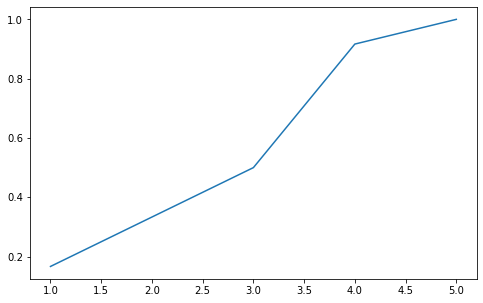

In [10]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.show()

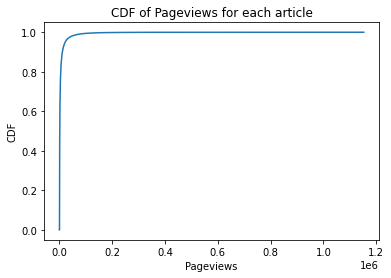

In [11]:
### ~ 3.3.1
### Your code here! ###
total_view = articles.sum(axis=1)
#caculate the total pageviews of each article

pageviews, cdf = get_cdf(total_view)
plt.plot(pageviews, cdf)
plt.xlabel('Pageviews')
plt.ylabel('CDF')
plt.title('CDF of Pageviews for each article')
plt.show()

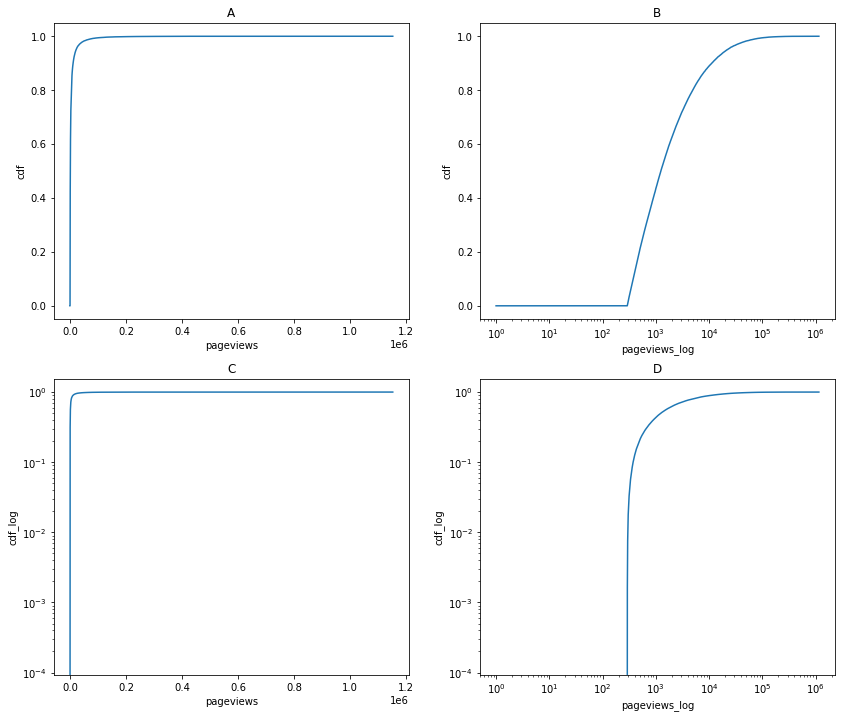

In [12]:
### ~ 3.3.2
### Your code here! ###
#a. x-axis on linear scale, y-axis on linear scale
plt.figure(figsize=(14,12))
plt.subplot(221)
plt.plot(pageviews, cdf)
plt.xlabel('pageviews')
plt.ylabel('cdf')
plt.title('A')
#b. x-axis on log scale, y-axis on linear scale
plt.subplot(222)
plt.semilogx(pageviews, cdf)
plt.xlabel('pageviews_log')
plt.ylabel('cdf')
plt.title('B')
#c. x-axis on linear scale, y-axis on log scale
plt.subplot(223)
plt.semilogy(pageviews, cdf)
plt.xlabel('pageviews')
plt.ylabel('cdf_log')
plt.title('C')
#d. x-axis on log scale, y-axis on log scale
plt.subplot(224)
plt.loglog(pageviews, cdf)
plt.xlabel('pageviews_log')
plt.ylabel('cdf_log')
plt.title('D')
plt.show()

In [13]:
### ~ 3.3.3
### Your text here! ###

# plot B has an odd fact that it has a turning point which is in the middle of the plot.
# it is because the minimum of the toatal pageviews is 291, thus when x axis value less than 291, its cdf value is 0.
# You can not find this in other plot because in figure A and C their x axis is linear so x=291 is too small to observe.
# In  figure D, when x <= 291 log(cdf)=log(0)=-∞, it can't be plot

# Also, A and C have drammaticly increased in the beginning of x axis and become nearly flat afterwards
# This is because most of articles only have a small number pageviews in total (thousands), while several exceptions than 1 million

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

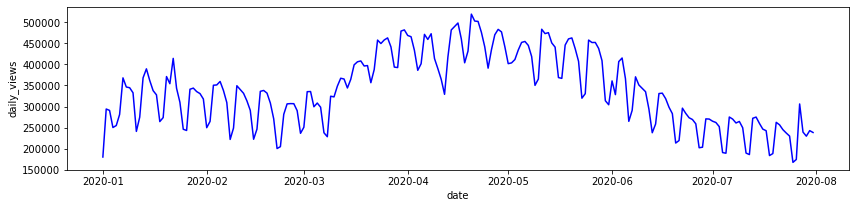

In [15]:
### ~ 4.1.1

page_views = articles.sum().drop('index')    # calculate the daily page views of each day
page_views_2020 = page_views[page_views.index >= str("2020-01-01 00:00:00")] # consider only the data in 2020


plt.figure(figsize=(14,3)) # change this if needed
plt.plot(pd.date_range(start='2020/01/01', end='2020/07/31', freq='1D'), page_views_2020.values, color='blue') # plot data
plt.xlabel('date')
plt.ylabel('daily_views')
plt.show()

In [16]:
### ~ 4.1.2
'''
We found that the data is very shaking, the period for the shaking is about 1 week.

'''

'\nWe found that the data is very shaking, the period for the shaking is about 1 week.\n\n'

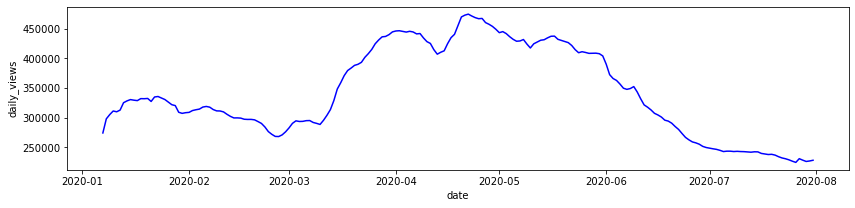

In [18]:
### ~ 4.1.3
page_views_2020_smooth = pd.Series(page_views_2020).rolling(window=7).mean() 
# smooth the data, the window is chosen to be 7, because we want to smooth the data in a period of 7 (which is the shaking period)

plt.figure(figsize=(14,3)) # change this if needed
plt.plot(pd.date_range(start='2020/01/01', end='2020/07/31', freq='1D'), page_views_2020_smooth.values, color='blue') # plot the data
plt.xlabel('date')
plt.ylabel('daily_views')
plt.show()

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

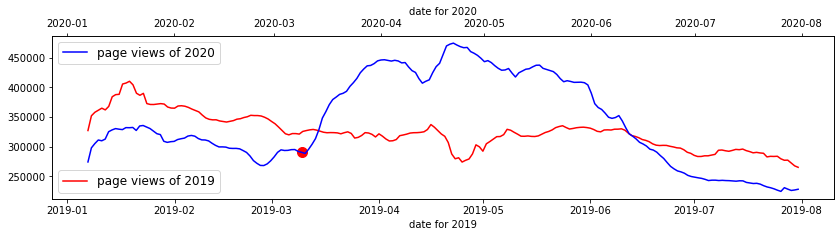

In [19]:
### ~ 4.2.1

page_views_2019_temp = page_views[page_views.index >= str("2019-01-01 00:00:00")] 
page_views_2019 = page_views_2019_temp[page_views_2019_temp.index <= str("2019-07-31 00:00:00")] # consider the period between 2019/01/01 - 2019/07/31, to make a comparison
page_views_2019_smooth = pd.Series(page_views_2019).rolling(window=7).mean() # smooth the data

index_for_lockdown = page_views_2020_smooth.index.tolist().index("2020-03-09 00:00:00") # find the index of the lockdown date(2020-03-09)

page_views_2019_smooth.index=pd.to_datetime(page_views_2019_smooth.index) 
page_views_2020_smooth.index=pd.to_datetime(page_views_2020_smooth.index) # convert the data to datetime

fig = plt.figure(figsize=(14,3)) # change this if needed

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny() # share y axis

ax1.plot(page_views_2019_smooth.index, page_views_2019_smooth, color='red', label='page views of 2019') # plot the data for 2019
ax2.plot(page_views_2020_smooth.index, page_views_2020_smooth, color='blue', label='page views of 2020') # plot the data for 2020

ax1.set_xlabel("date for 2019") 
ax2.set_xlabel("date for 2020")
ax1.legend(loc='lower left', fontsize=12) # show label and set the location to lower left for label of 2019 data
ax2.legend(loc='upper left', fontsize=12) # show label and set the location to upper left for label of 2019 data

ax2.scatter(page_views_2020_smooth.index[index_for_lockdown], page_views_2020_smooth['2020-03-09'], color='red', s =100) 
# Highlight the date 2020-03-09 when the lockdown started in Italy.
plt.show()

In [20]:
### ~ 4.2.2
'''
In the first 2.5 months, total daily page views of 2019 exceed those of 2020, howerver, after the nationwide lockdown 
in Italy (9 March 2020),the daily page views of 2020 started to increase very rapidly and very soon exceeded the numbers
of 2019. After June, the daily page views of 2020 decreased to a level lower than the number of 2019.

Hypothese: The reason for this difference is probably that the national lockdown forces people to stay at home, and
thus they have more time to view the articles in Wikipedia.

'''

'\nIn the first 2.5 months, total daily page views of 2019 exceed those of 2020, howerver, after the nationwide lockdown \nin Italy (9 March 2020),the daily page views of 2020 started to increase very rapidly and very soon exceeded the numbers\nof 2019. After June, the daily page views of 2020 decreased to a level lower than the number of 2019.\n\nHypothese: The reason for this difference is probably that the national lockdown forces people to stay at home, and\nthus they have more time to view the articles in Wikipedia.\n\n'

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

In [23]:
### ~ 5.1.1
### Your code here! ###
from datetime import datetime, date, time
import numpy as np

def reverse_dict(mapping):
    #reverse the English-Italian dictionary to Italian-English
    mapping_new=dict(zip(mapping.values(),mapping.keys()))
    return mapping_new

def translate(index):
    #tanslate using new mapping
    if index in mapping_new:
        index = mapping_new[index]
    return index
    

mapping_new = reverse_dict(mapping)
#reverse the English-Italian dictionary 
   
articles_temp = articles.copy()
articles_temp['index'] = articles_temp['index'].map(translate)
#translate articles index to english
#and then match each topic with its english article name and record them in two lists

topic_name = []
article_name = []
   

date = articles.columns.drop('index')
# date from '2018-01-01 00:00:00' to '2020-07-31 00:00:00'
topic = topics.columns.drop('index')
#64 topics

for tpc in topic: 
    list_temp = topics[topics[tpc]]['index'].values.tolist()
    article_name.extend(list_temp)
    topic_name.extend([tpc]*len(list_temp))
#sum 2 str_lists for 64 topics*article_number_each_topic and article_name belongs to each topic
    
topic_article = pd.DataFrame({'topic':topic_name, 'index':article_name})
#create a dataframe to store topic_name and article_name

day_views_topic = pd.merge(topic_article, articles_temp)    
day_views_topic.drop('index', axis=1, inplace=True)         
day_views_topic = day_views_topic.groupby('topic').aggregate('sum')
#merge tables, sum the same topic of each day

day_views_topic.columns = day_views_topic.columns.map(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date())
#transfor string datatype datetime to datetime datatype

topic_view = day_views_topic.melt(ignore_index=False, var_name='date', value_name='views')
topic_view.sort_values(by=['topic', 'date'], inplace=True)
#Finally, transform the DataFrame to the requird format using .melt() method and sort them 

topic_view






# '''This is the initial version of our solution.
# we have thought that the name of articles(56791 columns) may exsit multiple-one relation 
# with topics.index(not 64 topic, but 35611 english words), which may be a bit more complicated, 
# becauese we have to match 35k*55k strings one by one.
# We use to many for-loop and directly operate with the complicated DataFrame 
# It costs 3 or 4 hours to calculate the result, so we change to another solution considering it's one-one correspondence '''
# from datetime import datetime, date, time
# import numpy as np

# def reverse_dict(mapping):
#     #reverse the English-Italian dictionary to Italian-English
#     mapping_new=dict(zip(mapping.values(),mapping.keys()))
#     return mapping_new

# def data_process(day_views_topic, articles, topics, mapping_new):
#     articles_temp = articles.copy()
#     for index, row in articles_temp.iterrows():
#         if row['index'] in mapping_new:
#             row['index'] = mapping_new[row['index']]
#             #translate articles index to english
#             for ind_num, topic in topics['index'].items():
#                 if row['index'] in topic:
#                     row['index'] = topic
#                     #translate english article name to topic
#                     topic_str_list = topics.loc[ind_num].index[topics.loc[ind_num].values==True].to_list()
#                     for tsl in topic_str_list:
#                         day_views_topic.loc[tsl] += articles_temp.loc[index]
#     return day_views_topic




# mapping_new = reverse_dict(mapping)
# #reverse the English-Italian dictionary so that we can translate the articles' index to English
# #and then match the index with topics

# dvt_col = articles.columns.drop('index')
# dvt_index = topics.columns.drop('index')
# day_views_topic = pd.DataFrame(data=np.zeros((64,943)), index=dvt_index, columns=dvt_col)
# day_views_topic.index.name = 'index'
# #create the DataFrame to store Statistical data
# #row index is different topics, col index is dates

# day_views_topic = data_process(day_views_topic, articles, topics, mapping_new)
# dvt_col = dvt_col.map(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))
# day_views_topic.columns = dvt_col
# day_views_topic
# #processing data: Traverse every row of articles: firstly translate the index into English with reversed mapping
# #then match the index with the topic and add the pageviews to the day_views_topic DataFrame accordingly

# results = day_views_topic.melt(ignore_index=False, var_name='date', value_name='views')
# results.sort_values(by=['index', 'date'])
# #Finally, transform the DataFrame to the requird format using .melt() method           

,date,views
topic,,
Culture.Biography.Biography*,2018-01-01,58097
Culture.Biography.Biography*,2018-01-02,86953
Culture.Biography.Biography*,2018-01-03,88707
Culture.Biography.Biography*,2018-01-04,94670
Culture.Biography.Biography*,2018-01-05,90821
...,...,...
STEM.Technology,2020-07-27,11507
STEM.Technology,2020-07-28,11023
STEM.Technology,2020-07-29,11131


### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

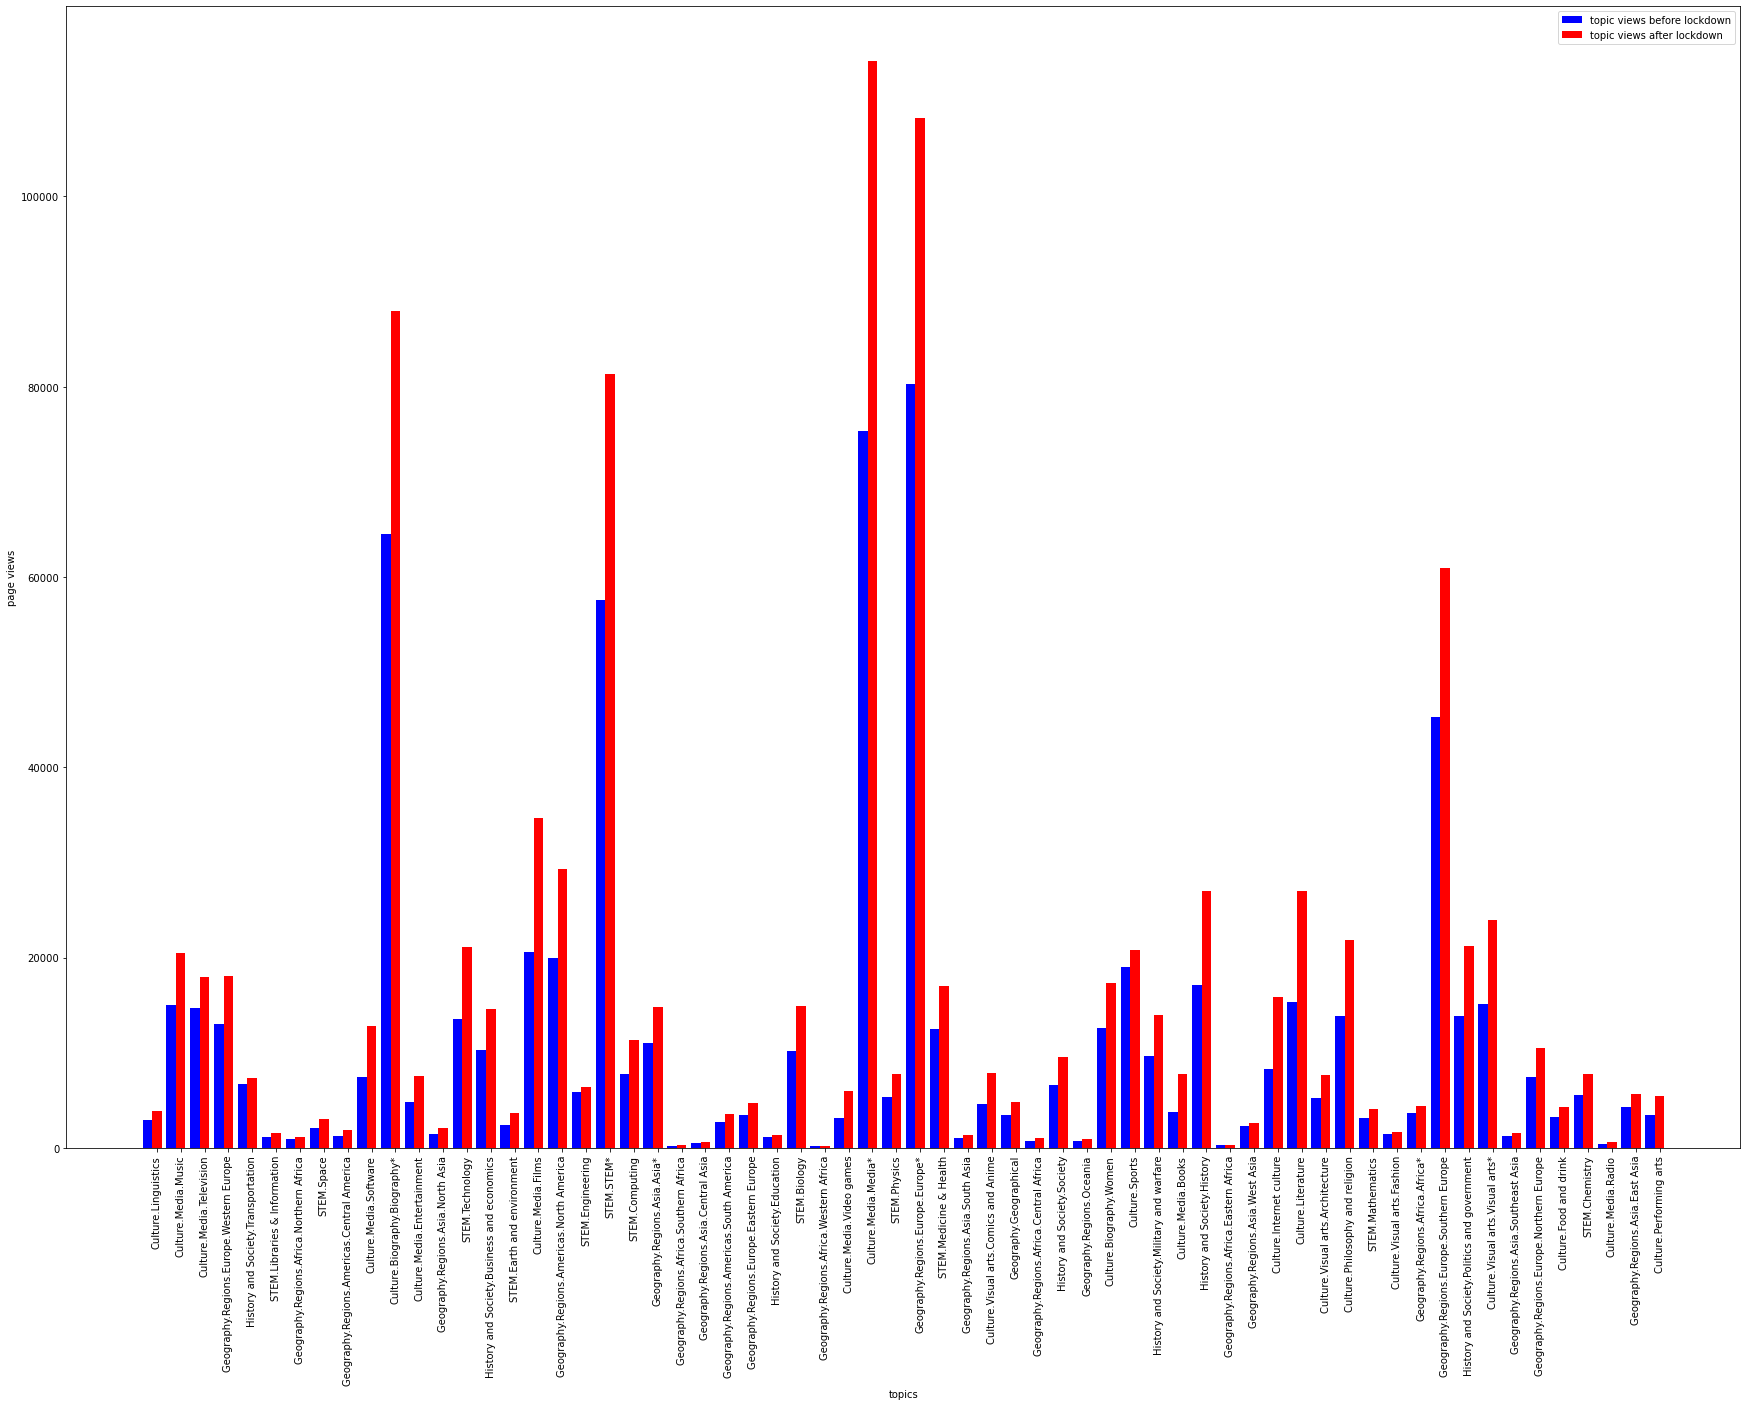

In [24]:
import seaborn as sns
### ~ 5.2
### Your code here! ###

topic_view.reset_index(inplace=True)    #
topic_view.date = topic_view.date.map(lambda d: d.strftime('%Y-%m-%d'))    #transform date datatype

topic_names_set = set(topic_view.topic)    # count the names of topics by using set
topic_names = list(topic_names_set)     # turn the set into list to avoid randomness

topic_views_before = np.zeros((64,1))
topic_views_after = np.zeros((64,1))

for i in range(0,64):
    topic_i = topic_view[topic_view.topic.isin([topic_names[i]])]   # find the respective topic in the Dataframe

    topic_i_before_temp = topic_i[topic_i.date <'2020-03-09']
    topic_i_before = topic_i_before_temp[topic_i_before_temp.date >='2020-02-03'] # consider the period 35 days before the lockdown
    topic_views_before[i] = topic_i_before.sum()['views'] / 35  # calculate the mean page views before lockdown
    
    topic_i_after_temp = topic_i[topic_i.date >='2020-03-09']
    topic_i_after = topic_i_after_temp[topic_i_after_temp.date <'2020-04-13'] # consider the period 35 days after the lockdown
    topic_views_after[i] = topic_i_after.sum()['views'] / 35  # calculate the mean page views after lockdown

# plt.figure(figsize=(14,10)) # change this if needed

fig, ax = plt.subplots(figsize=(30,21)) 

index = np.arange(64)
width = 0.4

bar1 = ax.bar(index, topic_views_before[:,0], width, color='b',label='topic views before lockdown') # bar1 is for topic views before lockdown (blue)
bar2 = ax.bar(index+width, topic_views_after[:,0], width,color='r',label='topic views after lockdown')  # bar1 is for topic views after lockdown (red)

ax.set_xticks(index + width)
ax.set_xticklabels(topic_names, rotation=90) # xtick is the respective topic name, it is rotated 90 degrees to save spacce
ax.legend() # show the labels
plt.xlabel('topics')
plt.ylabel('page views')
plt.savefig('result for 5.2.png', dpi=200) # save the picture for a clearer view
plt.show()


### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

In [25]:
### ~ 5.3.1
### Your code here! ###

# Obtain a date list from 2018-01-01~~2020-07-31

topic_dates_repeat = topic_view.date.values.tolist()   
topic_dates = sorted(set(topic_dates_repeat),key=topic_dates_repeat.index)  

# Initialize
date_num  = len(topic_dates)             # total number of dates
views_t_dates = np.zeros((date_num,1))   # Initialize to store the number of daily pageviews for a topic
views_ts_dates = np.zeros([date_num,64]) # Initialize to store the number of daily pageviews for 64 topics

#
for i in range(0,date_num):
    topic_date_i = topic_view[topic_view.date.isin([topic_dates[i]])] #obtain pageviews of one day for 64 topics
    temp1 = topic_date_i      
    views_t_dates[i]=temp1['views'].sum() #Each entry stores the total pageviews for 64 topics on each single day
    for j in range(0,64):
        # The number of pageview of topic j on day i divided on the total numbers of all topics on day i
        views_ts_dates[i][j]=temp1.views.values[j]/views_t_dates[i]   

temp2 = views_ts_dates.reshape(date_num*64,order='F') 
topic_view['ratio']= pd.Series(temp2)   # add the lable of 'ratio'
topic_view_ratio = topic_view
topic_view_ratio  # new dataframe which contains the data of ratio each day for every topic.

,topic,date,views,ratio
0,Culture.Biography.Biography*,2018-01-01,58097,0.101810
1,Culture.Biography.Biography*,2018-01-02,86953,0.094148
2,Culture.Biography.Biography*,2018-01-03,88707,0.093754
3,Culture.Biography.Biography*,2018-01-04,94670,0.097152
4,Culture.Biography.Biography*,2018-01-05,90821,0.098351
...,...,...,...,...
60347,STEM.Technology,2020-07-27,11507,0.014751
60348,STEM.Technology,2020-07-28,11023,0.018867
60349,STEM.Technology,2020-07-29,11131,0.019955
60350,STEM.Technology,2020-07-30,12406,0.020735


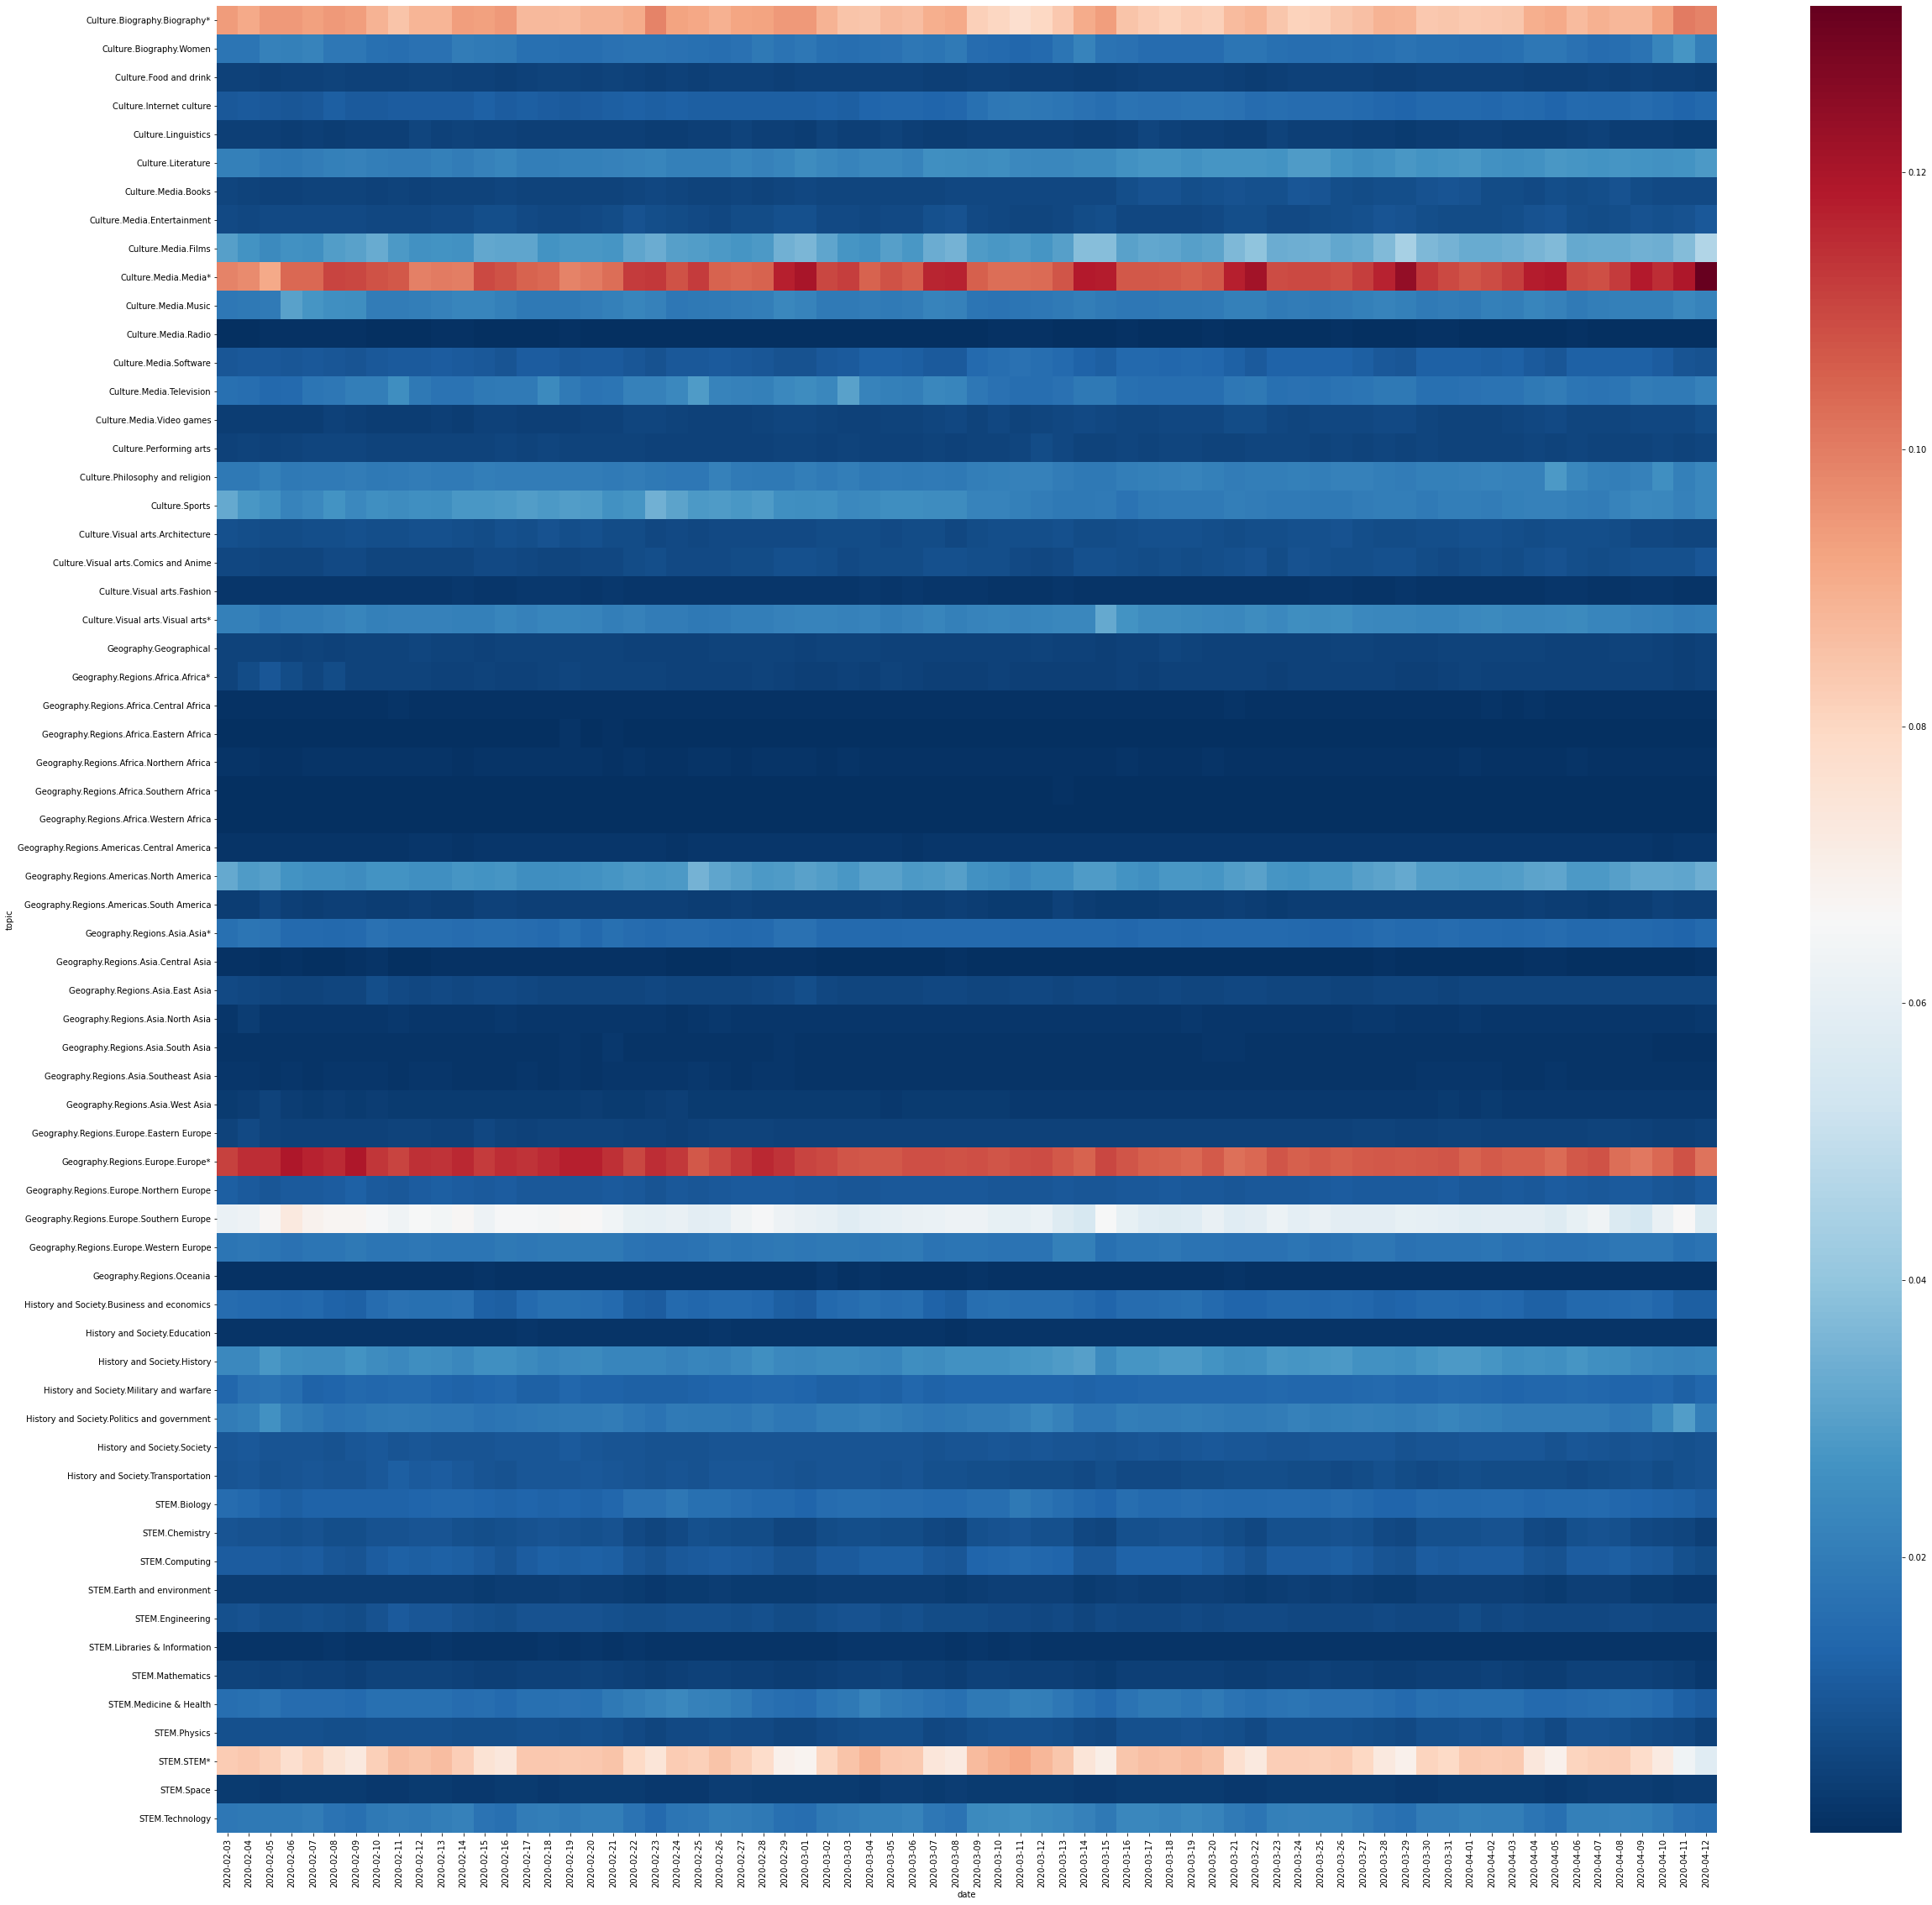

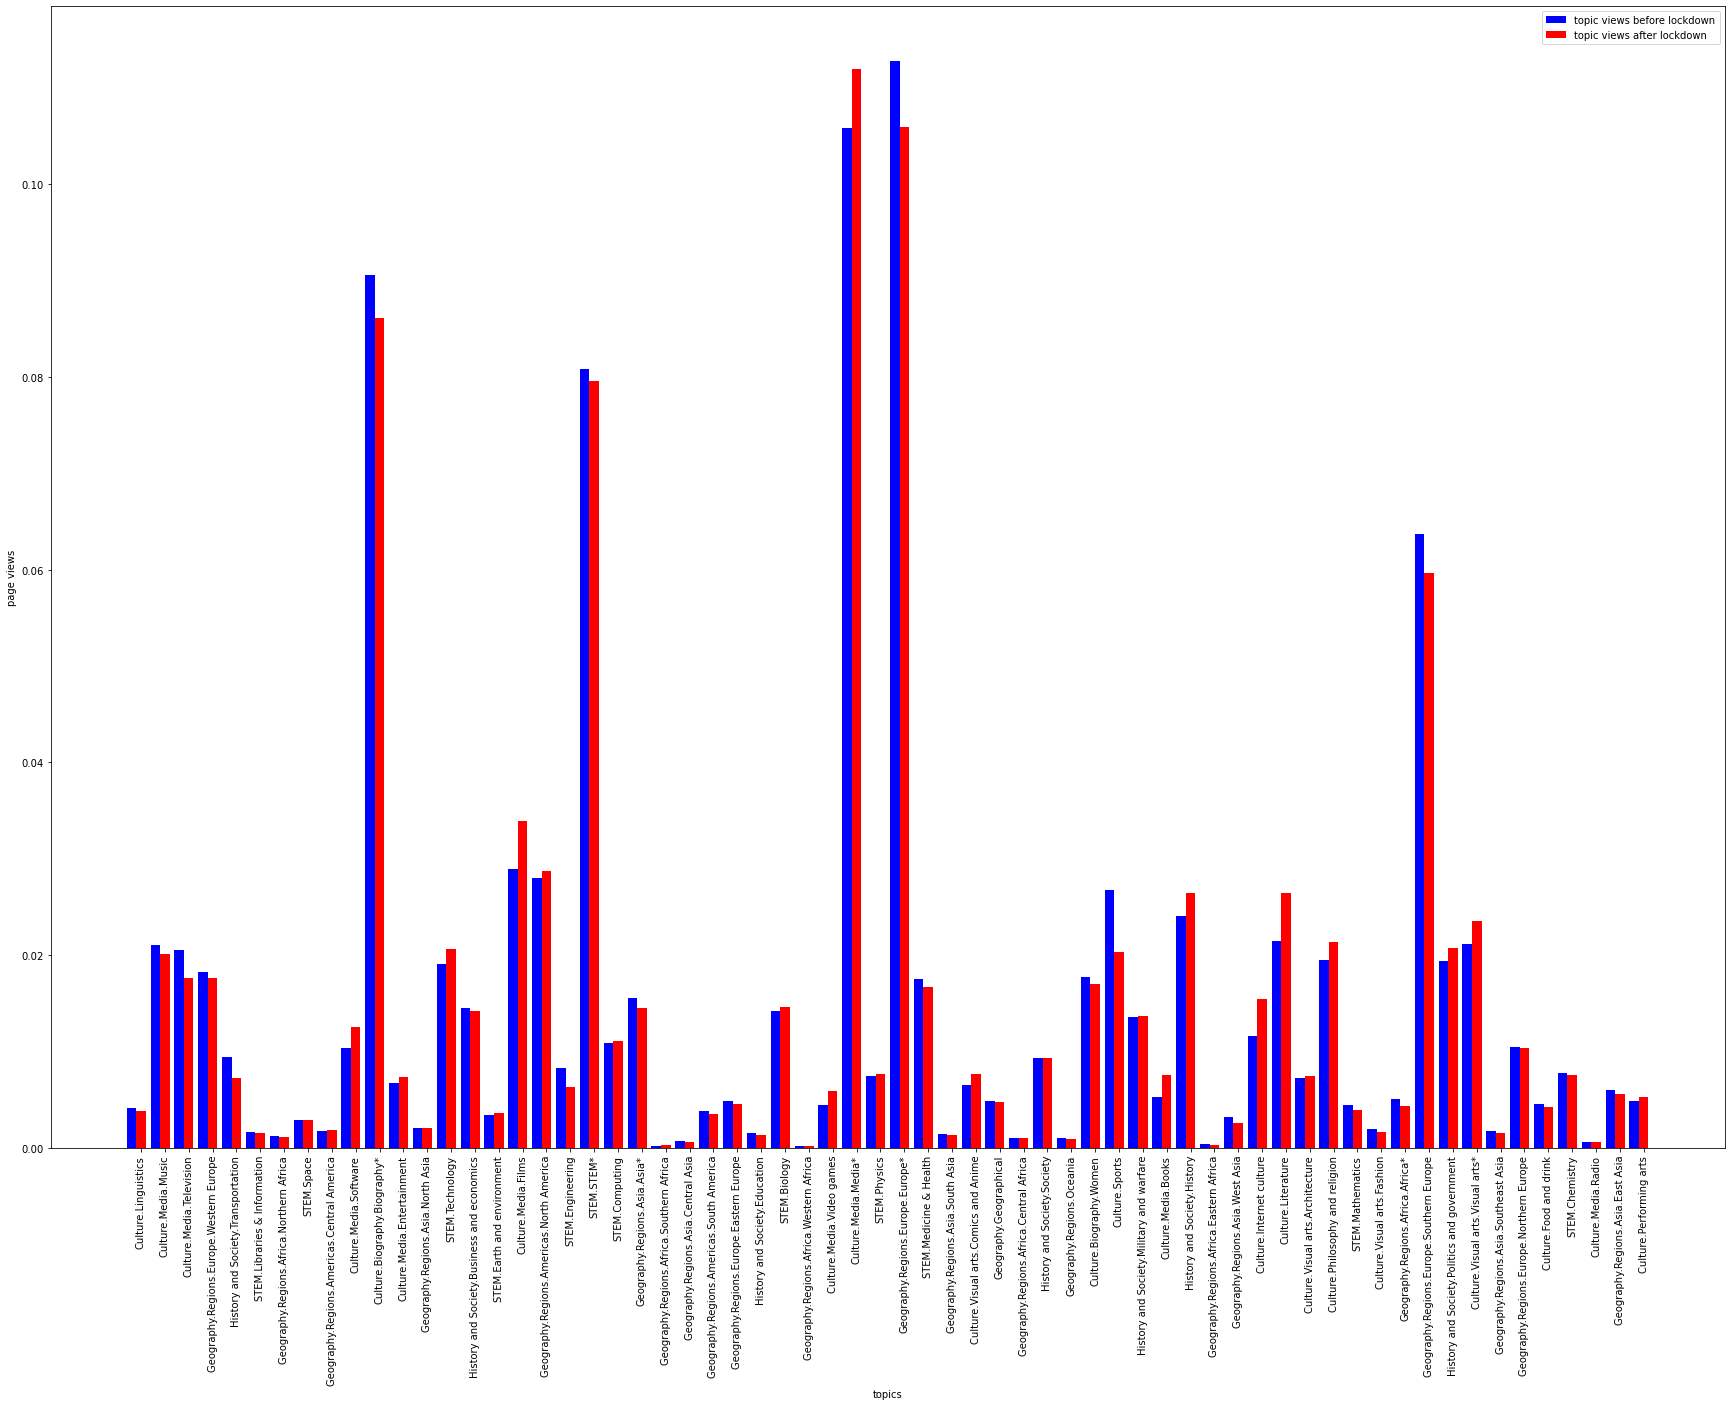

In [26]:
### ~ 5.3.2
### Your code here! ###

# In order to visualize the relative value of the data, we here draw two pictures. 
# The first one is a heatmap, which can show the varying trend of the data with respect to dates
# The second one is a bar chart, which is similar to the one we drew in 5.2 and can more clearly show the difference before and after the lockdown.



# Heatmap

# Compute the index of the days 35 days before and after the quarantine started
start_date = topic_dates.index('2020-02-03')
end_date   = topic_dates.index('2020-04-12')

v1 = topic_view_ratio.loc[start_date:end_date ]
for i in range(1,64):
    v1 = pd.concat([v1,topic_view_ratio.loc[763+943*i:832+943*i]])     
    
# This is the heat map of 64 topics from 
sns.set_context({"figure.figsize":(40,40)})
df4 = pd.crosstab(v1['topic'],v1['date'], values = v1['ratio'],  
                  margins=False, aggfunc='sum')
sns.heatmap(df4, annot=False,cmap="RdBu_r")




# Bar chart

# We will draw the relative daily average data of 35 days before and after the lockdown.
topic_views_before_percentage = np.zeros((64,1))
topic_views_after_percentage = np.zeros((64,1))

for i in range(0, len(topic_views_before)):
    topic_views_before_percentage[i] = topic_views_before[i]/sum(topic_views_before)
for i in range(0, len(topic_views_after)):
    topic_views_after_percentage[i] = topic_views_after[i]/sum(topic_views_after)
    
fig, ax = plt.subplots(figsize=(30,21)) 

index = np.arange(64)
width = 0.4

bar1 = ax.bar(index, topic_views_before_percentage[:,0], width, color='b',label='topic views before lockdown') # bar1 is for topic views before lockdown (blue)
bar2 = ax.bar(index+width, topic_views_after_percentage[:,0], width,color='r',label='topic views after lockdown')  # bar1 is for topic views after lockdown (red)

ax.set_xticks(index + width)
ax.set_xticklabels(topic_names, rotation=90) # xtick is the respective topic name, it is rotated 90 degrees to save spacce
ax.legend() # show the labels
plt.xlabel('topics')
plt.ylabel('page views')
plt.savefig('result for 5.3.2-bar chart.png', dpi=200) # save the picture for a clearer view
plt.show()

In [27]:
### ~ 5.3.3
### Your text here! ###

'''
According to the result of Task 5.2, all topics views have increased in terms of the raw, absolute
number of pageviews after the quarantine started. However, not all of their relative values have changed
after the lockdown. For example, the relative value of the topics "STEM.Chemistry" and Geographycal.Regions.
Africa.Africa*" decreased after the lockdown.

'''

'\nAccording to the result of Task 5.2, all topics views have increased in terms of the raw, absolute\nnumber of pageviews after the quarantine started. However, not all of their relative values have changed\nafter the lockdown. For example, the relative value of the topics "STEM.Chemistry" and Geographycal.Regions.\nAfrica.Africa*" decreased after the lockdown.\n\n'

---